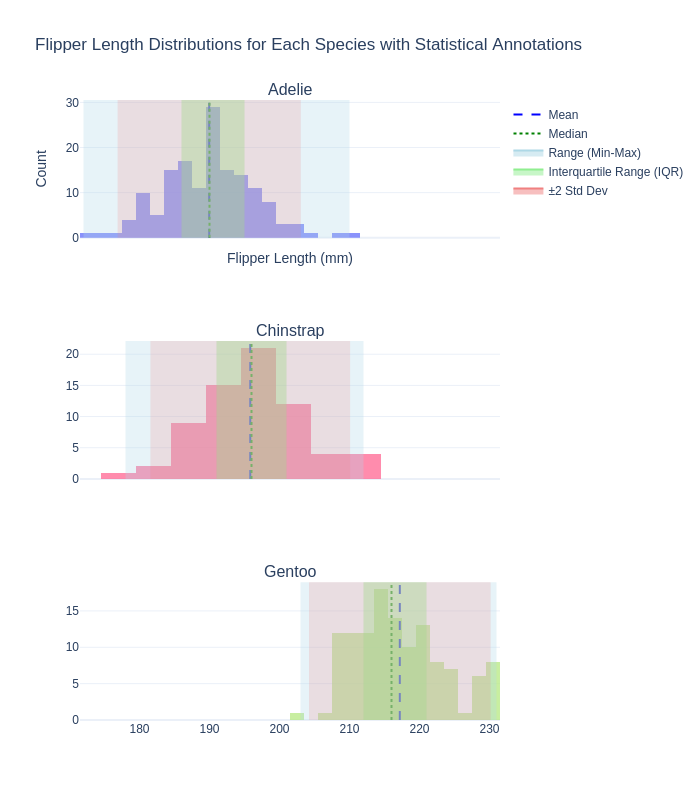

In [1]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out NaN values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = df['species'].unique()

# Create subplots: 1 row for each species
fig = make_subplots(rows=len(species_list), cols=1, shared_xaxes=True, subplot_titles=species_list)

# Define colors for the different lines and rectangles
colors = {
    'mean': 'blue',
    'median': 'green',
    'range': 'lightblue',
    'iqr': 'lightgreen',
    'std_range': 'lightcoral'
}

# Loop through each species and add histograms and lines/rectangles
for i, species in enumerate(species_list):
    species_data = df[df['species'] == species]
    
    # Compute statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    std = species_data['flipper_length_mm'].std()
    
    # Add histogram for this species
    fig.add_trace(go.Histogram(
        x=species_data['flipper_length_mm'],
        name=f"{species} Flipper Length",
        opacity=0.75,
        showlegend=False  # Disable histogram legend
    ), row=i+1, col=1)
    
    # Add invisible scatter traces for the legend
    if i == 0:  # Add legend only once
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='lines',
            line=dict(color=colors['mean'], dash='dash'),
            name="Mean"
        ))
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='lines',
            line=dict(color=colors['median'], dash='dot'),
            name="Median"
        ))
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='lines',
            line=dict(color=colors['range']),
            fill='toself', name="Range (Min-Max)"
        ))
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='lines',
            line=dict(color=colors['iqr']),
            fill='toself', name="Interquartile Range (IQR)"
        ))
        fig.add_trace(go.Scatter(
            x=[None], y=[None], mode='lines',
            line=dict(color=colors['std_range']),
            fill='toself', name="±2 Std Dev"
        ))
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=colors['mean'], dash='dash'), row=i+1, col=1)
    fig.add_vline(x=median, line=dict(color=colors['median'], dash='dot'), row=i+1, col=1)
    
    # Add vertical rectangles for ranges
    # Full range
    fig.add_vrect(x0=min_val, x1=max_val, 
                  fillcolor=colors['range'], opacity=0.3, line_width=0, row=i+1, col=1)
    
    # Interquartile range
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor=colors['iqr'], opacity=0.4, line_width=0, row=i+1, col=1)
    
    # Two standard deviations from the mean
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, 
                  fillcolor=colors['std_range'], opacity=0.2, line_width=0, row=i+1, col=1)

# Update layout with legend
fig.update_layout(
    title="Flipper Length Distributions for Each Species with Statistical Annotations",
    xaxis_title="Flipper Length (mm)",
    yaxis_title="Count",
    barmode="overlay",
    template="plotly_white",
    height=800,  # Adjust the height based on number of subplots
    showlegend=True  # Ensure the legend is visible
)

# Show the figure
fig.show(renderer="png")

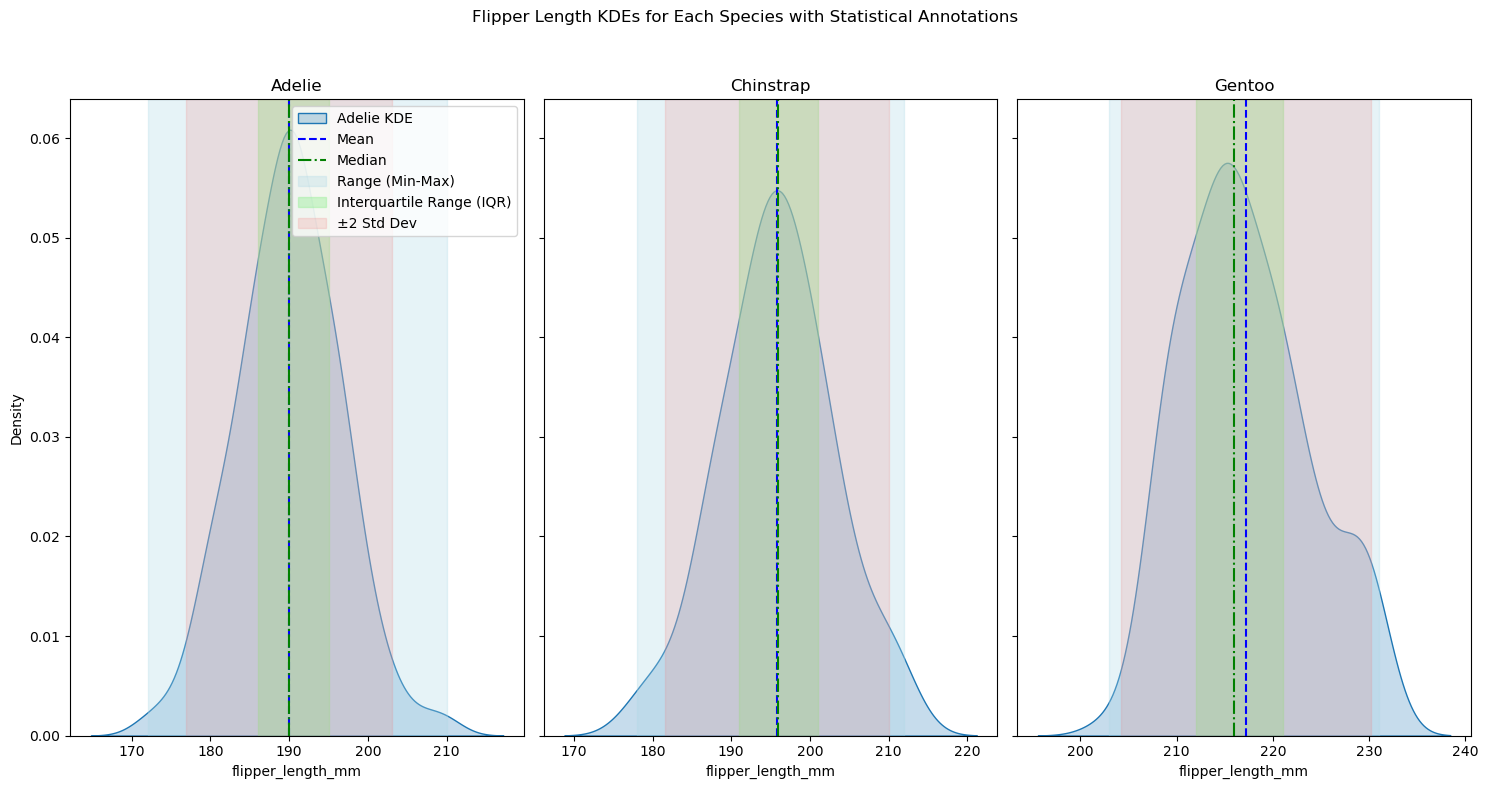

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv"
df = pd.read_csv(url)

# Filter out NaN values for flipper_length_mm
df = df.dropna(subset=['flipper_length_mm'])

# Get unique species
species_list = df['species'].unique()

# Calculate number of rows needed (3 plots per row)
n_rows = int(np.ceil(len(species_list) / 3))

# Set up the subplots grid
fig, axes = plt.subplots(n_rows, 3, figsize=(15, 8), sharex=False, sharey=True)
fig.suptitle("Flipper Length KDEs for Each Species with Statistical Annotations", y=0.98)

# Flatten the axes array for easy indexing if needed
axes = axes.flatten()

# Loop through each species and plot KDE with annotations
for i, species in enumerate(species_list):
    species_data = df[df['species'] == species]
    
    # Compute statistics
    mean = species_data['flipper_length_mm'].mean()
    median = species_data['flipper_length_mm'].median()
    min_val = species_data['flipper_length_mm'].min()
    max_val = species_data['flipper_length_mm'].max()
    q1 = species_data['flipper_length_mm'].quantile(0.25)
    q3 = species_data['flipper_length_mm'].quantile(0.75)
    std = species_data['flipper_length_mm'].std()
    
    # KDE plot for the current species
    sns.kdeplot(species_data['flipper_length_mm'], ax=axes[i], fill=True, label=f"{species} KDE")
    
    # Add vertical lines for mean and median
    axes[i].axvline(mean, color='blue', linestyle='--', label="Mean")
    axes[i].axvline(median, color='green', linestyle='-.', label="Median")
    
    # Add shaded regions for range, IQR, and ±2 standard deviations
    # Range (min-max)
    axes[i].axvspan(min_val, max_val, color='lightblue', alpha=0.3, label="Range (Min-Max)")
    
    # IQR
    axes[i].axvspan(q1, q3, color='lightgreen', alpha=0.4, label="Interquartile Range (IQR)")
    
    # ±2 standard deviations
    axes[i].axvspan(mean - 2*std, mean + 2*std, color='lightcoral', alpha=0.2, label="±2 Std Dev")
    
    # Title for each subplot
    axes[i].set_title(f"{species}")
    
    # Add a legend in the first subplot
    if i == 0:
        axes[i].legend()

# Turn off any empty axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Question 3:

I prefer KDEs over other data distribution visiualization methods. Its visually appealing in a way that allows for readers to get a good sense of the trends present in a dataset. While not being as descriptive as a histogram, you can still ascertain an idea of the frequency of values in the data, with the mean typically being the most noticable feature. KDE's also allow you to notice significant shifts in trends, like how with the Gentoo, there's that little bump around the 230mm mark that lets you know that while being a smaller part of the dataset compared to the peak, there are a decent number of penguins that have a flipper length of around 230mm.

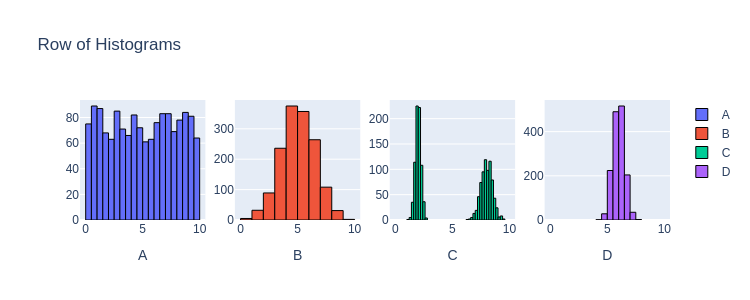

In [3]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Question 4:

1. B and D have similiar means and similar variances
2. A and B, and A and D have similiar means but different variances
3. B and C, and C and D have similiar variances but different means
4. A and C have different means and different variances

First ChatGPT Session:

Here’s a summary of our chat:

Visualizations: We discussed the differences between box plots, histograms, and KDEs, where you described their strengths and weaknesses. Box plots summarize key statistics, histograms show frequency distributions, and KDEs provide smooth estimates of data distributions.

Pros and Cons: I outlined the pros and cons of each method:

Box Plots: Good for summarizing data and identifying outliers but less detailed about distribution shape.
Histograms: Effective for showing frequency but sensitive to bin size choices and can appear blocky.
KDEs: Offer smooth distributions and trends but can obscure specific data details and are bandwidth sensitive.
Histogram Analysis: You provided a code snippet for generating histograms using Plotly and asked about interpreting the relationships between the distributions:

You made several statements regarding the means and variances of the generated datasets (A, B, C, D), and we confirmed the accuracy of your interpretations based on the statistical properties of the distributions.
If there’s anything specific you’d like to add or revisit, just let me know!

https://chatgpt.com/share/66ef2d49-1564-8003-ac4c-c1ff9220a6bd

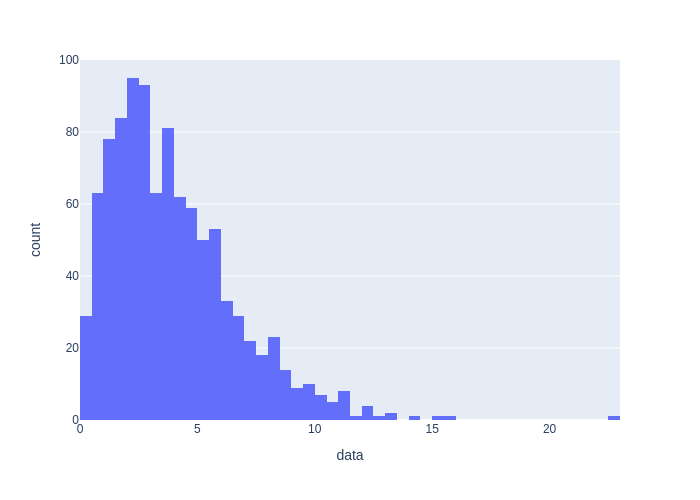

Mean: 3.9638911921256783
Median [3.45530525]


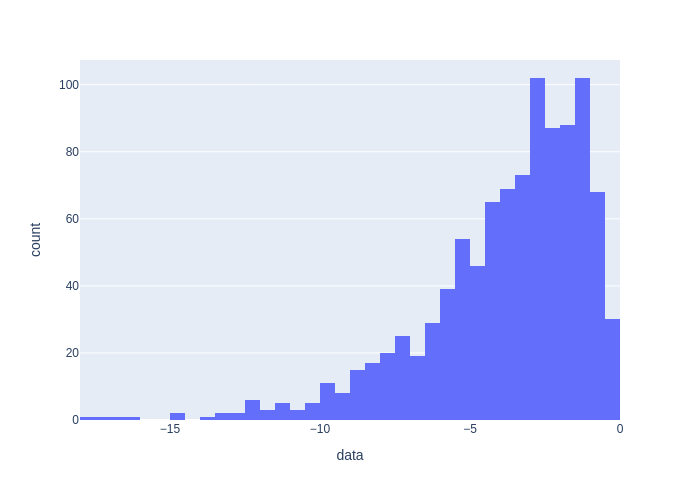

Mean: -3.8289908413134723
Median [-3.19969123]


In [4]:
from scipy import stats
import plotly.express as px
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

fig1.show(renderer="png")

print(f"Mean: {sample1.mean()}")
print(f"Median {np.quantile(sample1, [0.5])}") # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

fig1.show(renderer="png")

print(f"Mean: {sample2.mean()}")
print(f"Median {np.quantile(sample2, [0.5])}") # median

Question 5:

Skewness affects the relationship between the mean and median. The mean represents the average of all values within a distribution, and the median refers to the middle most value of a distribution, known as the 50th percentile. Above we have figures of a Gamma distribution and its negative version, alongside the mean and median of their respective distributions displayed below them. As we can see with the regular Gamma distribution, which is skewed right, the mean is larger than the median, while with the negative Gamma distribution, which is skewed left, the mean is less than the median. The reasoning for this has to do with the high density of extreme values on one side of the distribution for either skewness. The mean will of course be smaller or larger than the median if the majority of values are gathered on either side of the median. When most values in a distribution are less or more than the median, the mean will reflect that relation.

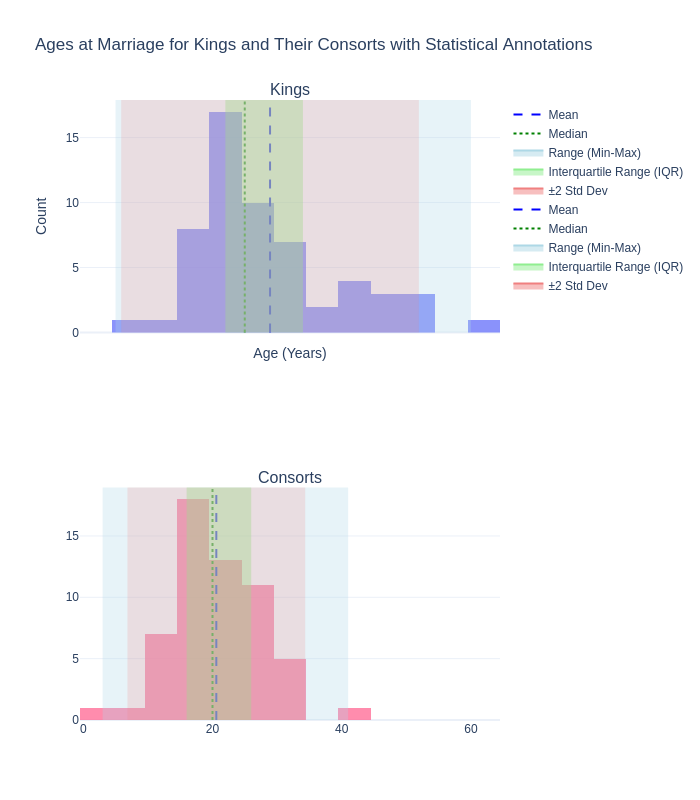

In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-20/english_monarchs_marriages_df.csv'
df = pd.read_csv(url)

# Convert king_age and consort_age to numeric, forcing errors to NaN
df['king_age'] = pd.to_numeric(df['king_age'], errors='coerce')
df['consort_age'] = pd.to_numeric(df['consort_age'], errors='coerce')

# Remove rows where king_age or consort_age is NaN
kings_df = df.dropna(subset=['king_age', 'consort_age'])

# Get unique categories
categories = ['Kings', 'Consorts']

# Create subplots: 1 row for kings and 1 row for consorts
fig = make_subplots(rows=len(categories), cols=1, shared_xaxes=True, subplot_titles=categories)

# Define colors for the different lines and rectangles
colors = {
    'mean': 'blue',
    'median': 'green',
    'range': 'lightblue',
    'iqr': 'lightgreen',
    'std_range': 'lightcoral'
}

# Function to add histogram and statistics
def add_species_data(fig, data, row, name):
    # Compute statistics
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std = data.std()

    # Add histogram for this species
    fig.add_trace(go.Histogram(
        x=data,
        name=f"{name} Age",
        opacity=0.75,
        showlegend=False  # Disable histogram legend
    ), row=row, col=1)

    # Add vertical lines for mean and median
    fig.add_vline(x=mean, line=dict(color=colors['mean'], dash='dash'), row=row, col=1)
    fig.add_vline(x=median, line=dict(color=colors['median'], dash='dot'), row=row, col=1)

    # Add vertical rectangles for ranges
    # Full range
    fig.add_vrect(x0=min_val, x1=max_val, 
                  fillcolor=colors['range'], opacity=0.3, line_width=0, row=row, col=1)

    # Interquartile range
    fig.add_vrect(x0=q1, x1=q3, 
                  fillcolor=colors['iqr'], opacity=0.4, line_width=0, row=row, col=1)

    # Two standard deviations from the mean
    fig.add_vrect(x0=mean-2*std, x1=mean+2*std, 
                  fillcolor=colors['std_range'], opacity=0.2, line_width=0, row=row, col=1)

    # Add invisible scatter traces for the legend
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines',
        line=dict(color=colors['mean'], dash='dash'),
        name="Mean"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines',
        line=dict(color=colors['median'], dash='dot'),
        name="Median"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines',
        line=dict(color=colors['range']),
        fill='toself', name="Range (Min-Max)"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines',
        line=dict(color=colors['iqr']),
        fill='toself', name="Interquartile Range (IQR)"
    ))
    fig.add_trace(go.Scatter(
        x=[None], y=[None], mode='lines',
        line=dict(color=colors['std_range']),
        fill='toself', name="±2 Std Dev"
    ))

# Add data for Kings
add_species_data(fig, kings_df['king_age'], row=1, name='Kings')

# Add data for Consorts
add_species_data(fig, kings_df['consort_age'], row=2, name='Consorts')

# Update layout with legend
fig.update_layout(
    title="Ages at Marriage for Kings and Their Consorts with Statistical Annotations",
    xaxis_title="Age (Years)",
    yaxis_title="Count",
    barmode="overlay",
    template="plotly_white",
    height=800,  # Adjust the height based on number of subplots
    showlegend=True  # Ensure the legend is visible
)

# Show the figure
fig.show(renderer="png")


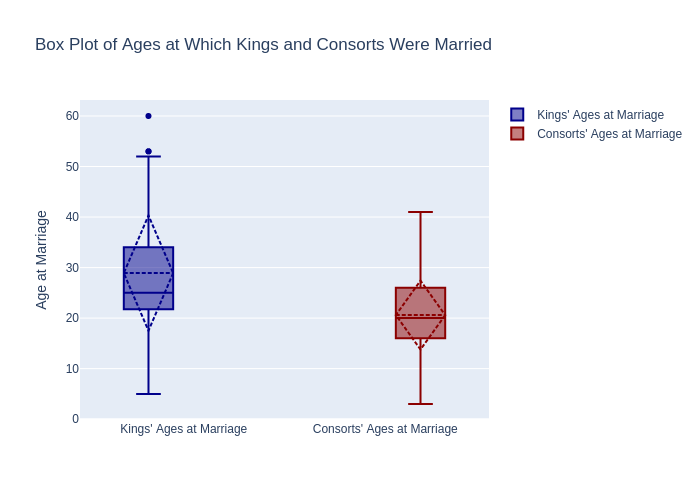

In [6]:
import pandas as pd
import plotly.graph_objects as go

# Load the dataset from the URL
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-20/english_monarchs_marriages_df.csv'
df = pd.read_csv(url)

# Convert king_age and consort_age to numeric, forcing errors to NaN (use coerce)
df['king_age'] = pd.to_numeric(df['king_age'], errors='coerce')
df['consort_age'] = pd.to_numeric(df['consort_age'], errors='coerce')

# Remove rows where king_age or consort_age is NaN or missing
kings_df = df.dropna(subset=['king_age', 'consort_age'])

# Create a box plot for both king_age and consort_age
box_plot = go.Figure()

# Add the box for kings' ages with dark blue color
box_plot.add_trace(go.Box(
    y=kings_df['king_age'],
    name='Kings\' Ages at Marriage',
    boxmean='sd',  # Show mean and standard deviation
    marker_color='darkblue',
    line_color='darkblue'  # Set line color to match the box color
))

# Add the box for consorts' ages with dark red color
box_plot.add_trace(go.Box(
    y=kings_df['consort_age'],
    name='Consorts\' Ages at Marriage',
    boxmean='sd',  # Show mean and standard deviation
    marker_color='darkred',
    line_color='darkred'  # Set line color to match the box color
))

# Update layout for the box plot
box_plot.update_layout(
    title='Box Plot of Ages at Which Kings and Consorts Were Married',
    yaxis_title='Age at Marriage',
    boxmode='group'  # Group the boxes together
)

# Show the box plot
box_plot.show(renderer="png")


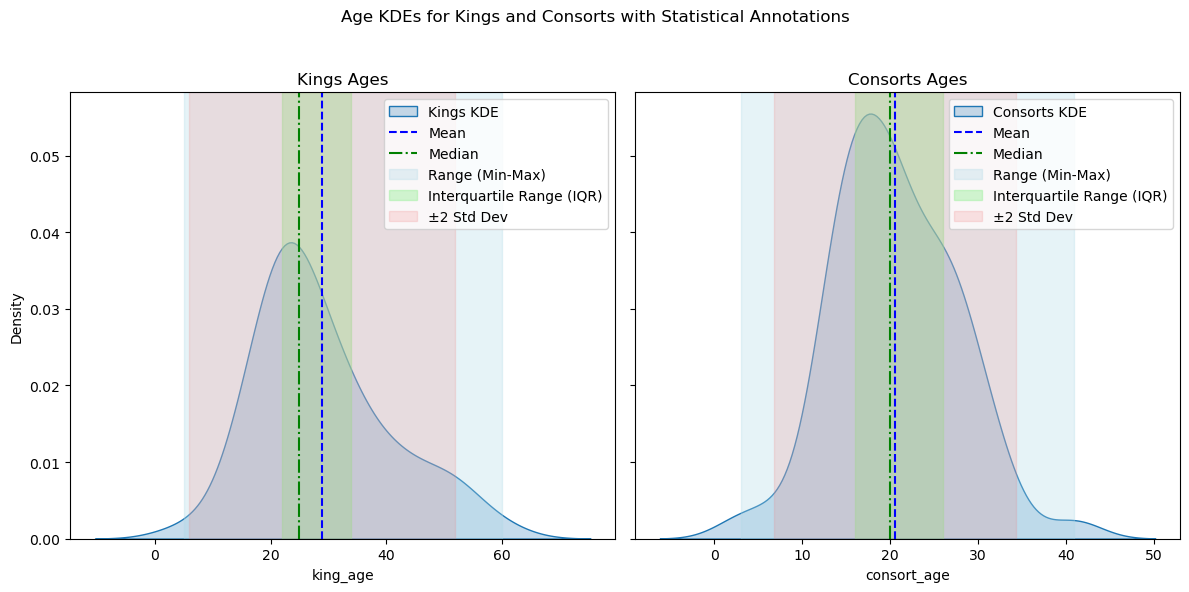

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2024/2024-08-20/english_monarchs_marriages_df.csv"
df = pd.read_csv(url)

# Convert king_age and consort_age to numeric, forcing errors to NaN
df['king_age'] = pd.to_numeric(df['king_age'], errors='coerce')
df['consort_age'] = pd.to_numeric(df['consort_age'], errors='coerce')

# Drop rows with NaN values in king_age and consort_age
df = df.dropna(subset=['king_age', 'consort_age'])

# Calculate number of rows needed (1 row for kings and 1 row for consorts)
n_rows = 1

# Set up the subplots grid
fig, axes = plt.subplots(n_rows, 2, figsize=(12, 6), sharex=False, sharey=True)
fig.suptitle("Age KDEs for Kings and Consorts with Statistical Annotations", y=0.98)

# Function to plot KDE with annotations
def plot_kde_with_annotations(data, ax, name):
    # Compute statistics
    mean = data.mean()
    median = data.median()
    min_val = data.min()
    max_val = data.max()
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    std = data.std()
    
    # KDE plot
    sns.kdeplot(data, ax=ax, fill=True, label=f"{name} KDE")
    
    # Add vertical lines for mean and median
    ax.axvline(mean, color='blue', linestyle='--', label="Mean")
    ax.axvline(median, color='green', linestyle='-.', label="Median")
    
    # Add shaded regions for range, IQR, and ±2 standard deviations
    ax.axvspan(min_val, max_val, color='lightblue', alpha=0.3, label="Range (Min-Max)")
    ax.axvspan(q1, q3, color='lightgreen', alpha=0.4, label="Interquartile Range (IQR)")
    ax.axvspan(mean - 2*std, mean + 2*std, color='lightcoral', alpha=0.2, label="±2 Std Dev")
    
    # Set title and legend
    ax.set_title(f"{name} Ages")
    ax.legend()

# Plotting KDE for Kings
plot_kde_with_annotations(df['king_age'], axes[0], "Kings")

# Plotting KDE for Consorts
plot_kde_with_annotations(df['consort_age'], axes[1], "Consorts")

# Adjust the layout for better readability
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

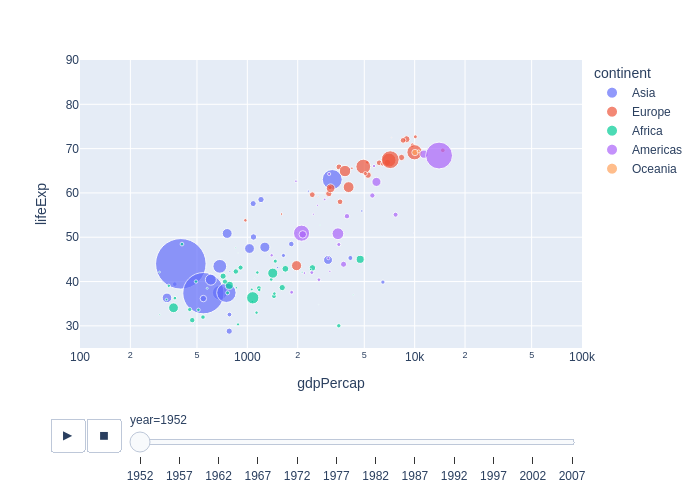

In [8]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show(renderer="png")

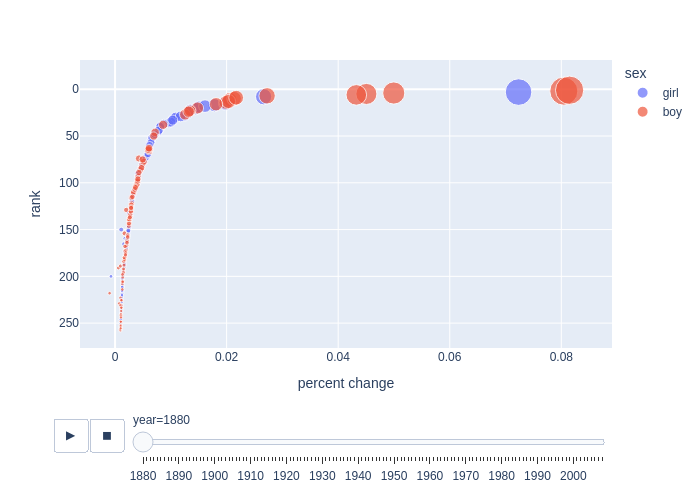

In [10]:
bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')
bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])
# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 
bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names
fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
           size="percent", color="sex", hover_name="name")
fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top
fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

Chat Session(s) 2:

Since I kept running out of limits for THREE sessions worth of chatbots, all I got are the links. Sorry.

https://chatgpt.com/share/66f32ae9-68c0-8003-a8ae-224e7d7da337

https://chatgpt.com/share/66f335c5-29c4-8003-a00c-4b0e3f02e375

https://chatgpt.com/share/66f335d3-0634-8003-acbc-180bc152ef22